In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing sklearn for data preparation
from sklearn.model_selection import train_test_split



In [2]:
#Class design
class Linear_Regressor(object):
    ###important : dataset enters as a pandas DataFrame
    def __init__(self, dataset, n_iter, alpha): 
        self.n_iter = n_iter
        self.alpha = alpha
        self.dataset = dataset
    
    #data preparation and splitting
    
    def data_process(self):      
        X = self.dataset.iloc[:,:-1].values
        y = self.dataset.iloc[:, -1].values
        X, y = np.array(X), np.array(y)# x and y converted to numpy arrays
        #reshape y
        y = np.reshape(y, (len(y), 1))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
        #add a ones column to X_train y X_test for fitting betas shape
        X_train = np.concatenate((np.ones((len(X_train),1)), X_train), axis = 1)
        X_test = np.concatenate((np.ones((len(X_test),1)), X_test), axis = 1)
        return X_train, X_test, y_train, y_test

    
    #Hipotesis
    def hipothesis(self, betas, X):
        return np.dot(X, betas)

    #Cost/Error each iteration
    def costo(self, h, y):
        m = len(y) 
        sub = h -y
        cost = np.sum(sub**2)/ (2 * m)
        return cost 

    #Betas update with gradient descent
    def theta_update(self, h, betas, X, y):
        m = len(y)
        sub = h -y
        betas = betas - (self.alpha/m) * np.dot(X.T,sub)  
        return betas
    
    #error metrics
    def MSE(self, betas_final, X, y): #Mean-square error for training or test set
        return np.sum((self.hipothesis(betas_final, X) - y)**2) / len(y)
    
    # R-square metric
    def r2(self, bf, X, y):
        SStot = np.sum((y - np.mean(y))**2)
        SSres = np.sum((self.hipothesis(bf,X) - y)**2)
        print(SSres, SStot)
        r2 = np.round( 1 - (SSres / SStot), decimals= 2)
        return r2


    
    #Main loop
    def regressor(self):
        J = [] #save cost of each iteration
        theta = [] #save the betas of each iteration
        i = 0
        X_train, X_test, y_train, y_test = self.data_process()
        m = len(y_train)
        betas = np.ones((X_train.shape[1],1))

        for _ in range(self.n_iter):
        #hipotesis
            h = self.hipothesis(betas, X_train) 
            #print("Hipotesis", i, ":", h) 
        #costo and appending it to J
            #print("Costo", i, ":",np.round(costo(h, y_train), decimals = 2)) 
            J.append(self.costo(h, y_train))

        #updating thetas
            betas = self.theta_update(h, betas, X_train, y_train)
            theta.append(betas)
            i +=1

        betas_final = betas
        print("Final result for", self.n_iter, "iterations:")
        print("Y_Mean Cost:", self.costo(np.mean(y_train), y_train))
        print("Minimum cost:", np.min(J))
        print("otro:", J[35])
        print("Iteration of minimum:", np.argmin(J))
        print("Minimum betas", theta[np.argmin(J)])
        print("MSE for training set :", np.round(self.MSE(betas_final, X_train, y_train), decimals = 2))
        print("MSE for test set :", np.round(self.MSE(betas_final, X_test, y_test), decimals = 2))
        print("R2 Training Set:", self.r2(betas_final, X_train, y_train))
        print("R2 Test Set:", self.r2(betas_final, X_test, y_test))
    
        ###Plotting results
        iter = np.arange(self.n_iter)
        cost_iter = J
        ax, fig = plt.subplots(figsize = (9,7))
        sns.lineplot(iter, cost_iter) 
        
    

In [3]:
df = pd.read_csv("bottle.csv")

In [4]:
df = df.loc[:, ["Salnty", "T_degC"]]

In [5]:
df.columns

Index(['Salnty', 'T_degC'], dtype='object')

In [6]:
df.isnull().sum().sum()/len(df)

0.06742917664416213

In [7]:
df.dropna(axis = 0, inplace= True)

In [8]:
df.shape

(814247, 2)

In [9]:
df = pd.DataFrame(data = df, columns=["Salnty", "T_degC"])

In [10]:
reg_t = Linear_Regressor(dataset = df, n_iter= 3000, alpha= 0.00001)

Final result for 3000 iterations:
Y_Mean Cost: 8.926506673695112
Minimum cost: 9.222446611090879
otro: 137.87585841289706
Iteration of minimum: 2999
Minimum betas [[0.979981  ]
 [0.29100171]]
MSE for training set : 18.44
MSE for test set : 18.43
12014948.097806083 11629399.33544995
R2 Training Set: -0.03
3001923.9154922175 2904912.337222805
R2 Test Set: -0.03


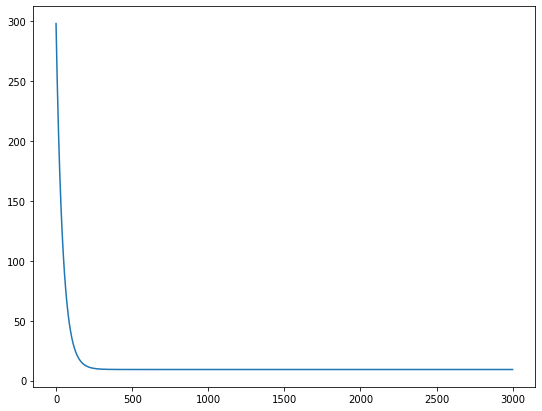

In [11]:
reg_t.regressor()

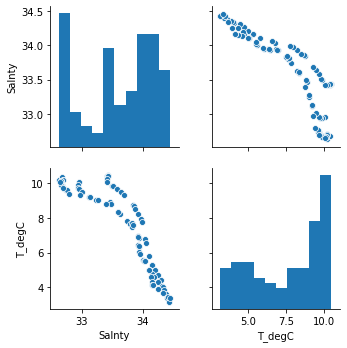

In [12]:
sns.pairplot(data= df[:100])

In [13]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

a, b= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)

In [14]:
type(b)

numpy.ndarray

In [15]:
b =np.reshape(b, (b.shape[0],1))

In [16]:
cc = np.concatenate((a,b), axis = 1)

In [17]:
cc.shape

(100, 2)

In [18]:
df2 = pd.DataFrame(cc, columns = ["X", "y"])

In [19]:
df2.head()

,X,y
0,1.861734,148.153318
1,0.700587,86.823535
2,-0.550778,19.966359
3,-0.424901,27.748242
4,0.325542,67.355675


In [20]:
onemore = Linear_Regressor(dataset = df2, n_iter = 1000, alpha= 0.002)

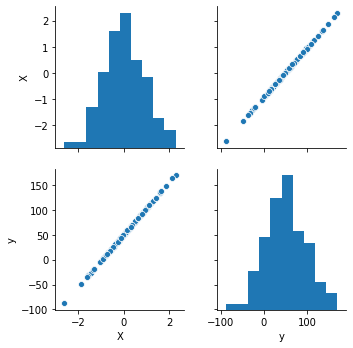

In [21]:
sns.pairplot(df2)

Final result for 1000 iterations:
Y_Mean Cost: 1085.1631690808142
Minimum cost: 54.061514084402006
otro: 2147.9246239106255
Iteration of minimum: 999
Minimum betas [[44.69270997]
 [43.33734574]]
MSE for training set : 107.72
MSE for test set : 98.11
8617.958640041794 173626.10705293028
R2 Training Set: 0.95
1962.2220016591284 50921.887674122874
R2 Test Set: 0.96


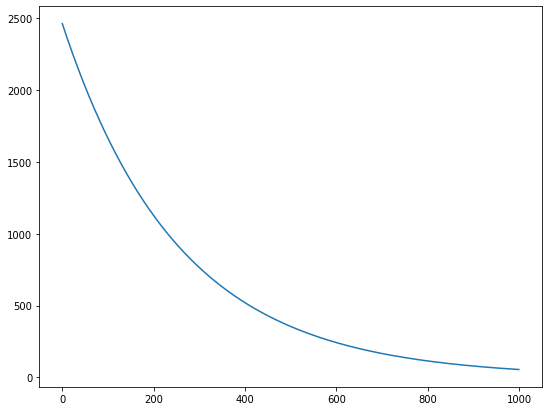

In [22]:
onemore.regressor()

In [23]:
from sklearn import datasets

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)



In [24]:
diabetes_y =np.reshape(diabetes_y, (diabetes_y.shape[0],1))

In [25]:
diabetes_y.shape

(442, 1)

In [26]:
dd = np.concatenate((diabetes_X,diabetes_y), axis = 1)

In [27]:
dd.shape

(442, 11)

In [28]:
df3 = pd.DataFrame(data = dd, columns = ["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8",
                                        "a9", "a10", "Diabetes"])

In [29]:
df3.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [30]:
diabetes = Linear_Regressor(dataset = df3, n_iter= 1000, alpha= 0.5)

Final result for 1000 iterations:
Y_Mean Cost: 3065.3488191061642
Minimum cost: 1448.746567490646
otro: 2720.6544277427906
Iteration of minimum: 999
Minimum betas [[ 152.11264887]
 [  12.83486317]
 [-127.72735948]
 [ 433.20071206]
 [ 246.93183031]
 [ -21.46510465]
 [ -80.5313541 ]
 [-211.09431625]
 [ 145.65178252]
 [ 359.72968157]
 [ 127.40346229]]
MSE for training set : 2897.18
MSE for test set : 3270.86
1022703.7942313049 2164136.266288952
R2 Training Set: 0.53
291106.83427463507 456385.5056179776
R2 Test Set: 0.36


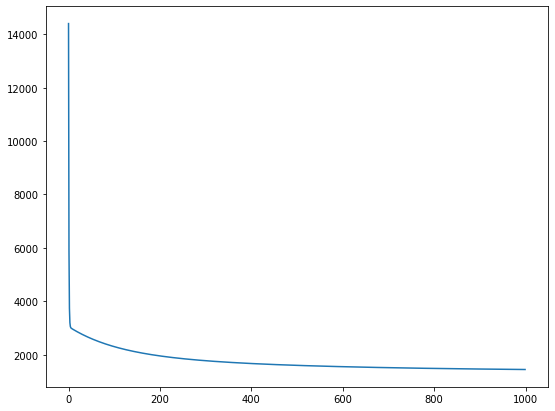

In [31]:
diabetes.regressor()

In [32]:
from sklearn.datasets import load_boston

In [33]:
boston_X, boston_y = load_boston(return_X_y= True)

In [34]:
boston_y =np.reshape(boston_y, (boston_y.shape[0],1))

In [35]:
ff = np.concatenate((boston_X, boston_y), axis = 1)

In [36]:
df5 = pd.DataFrame(data= ff)

In [37]:
df5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
boston = Linear_Regressor(dataset= df5, n_iter=10000, alpha= 0.000006)

Final result for 10000 iterations:
Y_Mean Cost: 42.57186011175375
Minimum cost: 22.968519058473127
otro: 355.58606208393894
Iteration of minimum: 9999
Minimum betas [[ 0.99946542]
 [-0.12033109]
 [ 0.12091764]
 [ 0.42944255]
 [ 1.0138327 ]
 [ 0.99821853]
 [ 1.16030553]
 [ 0.0736205 ]
 [ 0.80774169]
 [ 0.62779547]
 [-0.04218186]
 [ 0.51617585]
 [ 0.02314967]
 [-0.56511195]]
MSE for training set : 45.94
MSE for test set : 52.99
18557.96472864831 34398.06297029703
R2 Training Set: 0.46
5405.200482988971 8305.700784313725
R2 Test Set: 0.35


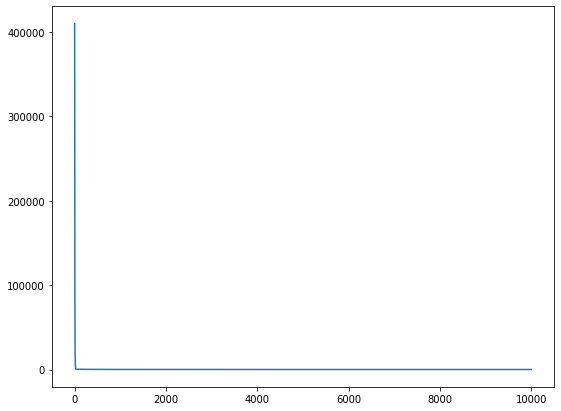

In [39]:
boston.regressor()